In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pyod.models.ecod import ECOD
from pyod.models.lunar import LUNAR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score


In [4]:
thyroid = pd.read_csv(r"C:\Users\purav\OneDrive\Desktop\Comparative Evaluation of Anomaly Detection Algorithms\Comparative-Evaluation-of-Anomaly-Detection-Algorithms\Datasets\annthyroid-unsupervised-ad.csv", header = None)

In [5]:
thyroid

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.45,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.06100,0.0060,0.023,0.087,0.026,o
1,0.61,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.02900,0.0150,0.061,0.096,0.064,o
2,0.16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.02900,0.0190,0.058,0.103,0.056,o
3,0.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.11400,0.0030,0.024,0.061,0.039,o
4,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.04900,0.0030,0.005,0.116,0.004,o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6911,0.65,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00047,0.0080,0.154,0.075,0.204,n
6912,0.77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00006,0.0206,0.125,0.107,0.117,n
6913,0.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00130,0.0250,0.125,0.114,0.109,n
6914,0.64,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00078,0.0206,0.106,0.088,0.121,n


In [6]:
shuffled_df = thyroid.sample(frac=1).reset_index(drop=True)
shuffled_df


df = pd.DataFrame(shuffled_df.iloc[:, :-1].values)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df))



In [7]:
y = shuffled_df.iloc[:,-1]
y = pd.DataFrame(y.replace({'o':1, 'n':0}))
y

,21
0,0
1,0
2,0
3,0
4,0
...,...
6911,0
6912,0
6913,0
6914,0


In [8]:
ecod = ECOD()
ecod.fit(df)

ECOD(contamination=0.1, n_jobs=1)

In [9]:
ecod_score = ecod.decision_function(df)

In [10]:
ecod_score

array([ 7.74941811, 11.99845113,  7.67817453, ..., 13.6010352 ,
       13.82062154, 14.22423339])

In [11]:
ecod_pred = ecod.predict(df)
ecod_pred

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
ecod_acc = accuracy_score(y, ecod_pred)
ecod_acc

0.8863504916136495

0.7394173417341734


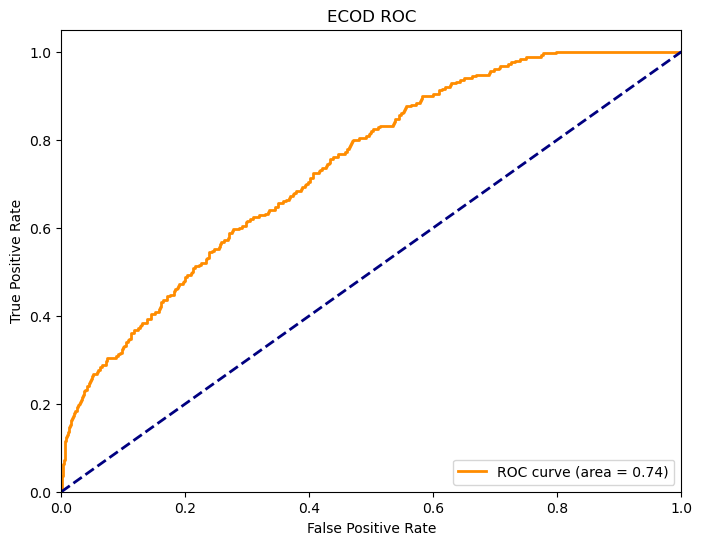

In [13]:
ecod_fpr, ecod_tpr, ecod_thresholds = roc_curve(y, ecod_score)
roc_auc = auc(ecod_fpr, ecod_tpr)
print(roc_auc)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(ecod_fpr, ecod_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ECOD ROC')
plt.legend(loc='lower right')
plt.show()

In [14]:
lunar = LUNAR()
lunar.fit(df)

LUNAR(contamination=0.1, epsilon=0.1, lr=0.001, model_type='WEIGHT',
   n_epochs=200, n_neighbours=5, negative_sampling='MIXED', proportion=1.0,
   scaler=MinMaxScaler(), val_size=0.1, verbose=0, wd=0.1)

In [15]:
lunar_score = lunar.decision_function(df)
lunar_score

array([-0.58544445, -0.5219749 , -0.75133914, ..., -0.34150633,
       -0.16599846,  0.6789267 ], dtype=float32)

In [16]:
lunar_pred = lunar.predict(df)
lunar_pred

array([0, 0, 0, ..., 0, 0, 1])

In [17]:
lunar_acc = accuracy_score(y,lunar_pred)
lunar_acc

0.8799884326200116

0.6368676867686769


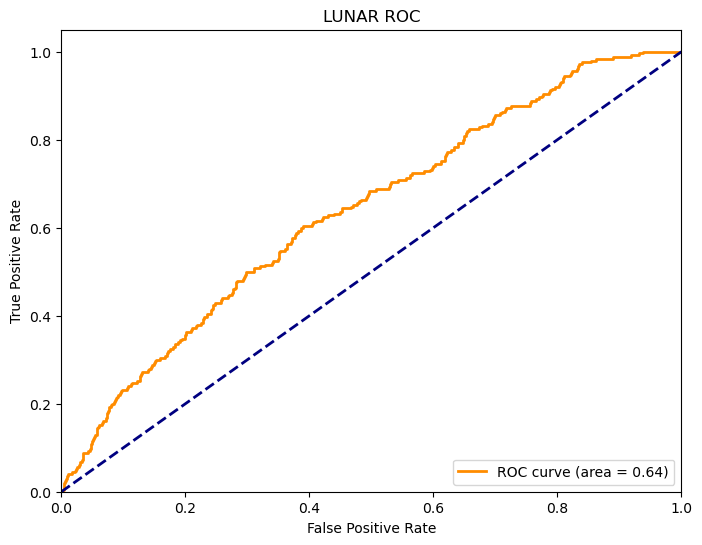

In [18]:
lunar_fpr, lunar_tpr, lunar_thresholds = roc_curve(y, lunar_score)
roc_auc = auc(lunar_fpr, lunar_tpr)
print(roc_auc)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(lunar_fpr, lunar_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LUNAR ROC')
plt.legend(loc='lower right')
plt.show()

In [19]:
y_array = y.values.ravel()

score_df = pd.DataFrame({'lunar_score': lunar_score, 'ecod_score': ecod_score, 'y': y_array})
score_df

,lunar_score,ecod_score,y
0,-0.585444,7.749418,0
1,-0.521975,11.998451,0
2,-0.751339,7.678175,0
3,-0.249664,14.263855,0
4,-0.266309,15.224671,0
...,...,...,...
6911,-0.584463,8.759520,0
6912,-0.599429,12.046335,0
6913,-0.341506,13.601035,0
6914,-0.165998,13.820622,0


In [20]:
x = score_df[['lunar_score', 'ecod_score']]
y = score_df['y']

In [27]:
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [28]:
y_pred_test = logreg.predict(x_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9610


In [30]:
print('Training set score: {:.4f}'.format(logreg.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(x_test, y_test)))

Training set score: 0.9648
Test set score: 0.9610


In [31]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logreg, x, y, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Average Cross-Validation Score: {np.mean(cv_scores)}')


Cross-Validation Scores: [0.96459538 0.96384671 0.96384671 0.96456978 0.96384671]
Average Cross-Validation Score: 0.9641410563447979


0.7707398739873987


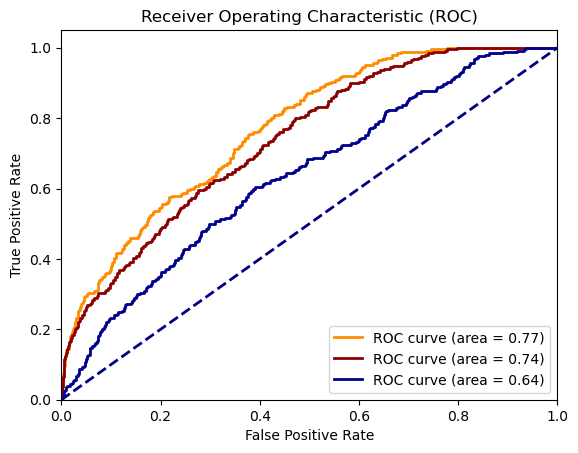

In [32]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Get predicted probabilities for the test set
y_prob = logreg.predict_proba(x)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)
roc_auc_ecod = auc(ecod_fpr, ecod_tpr)
roc_auc_lunar = auc(lunar_fpr, lunar_tpr)
print(roc_auc)
# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.plot(ecod_fpr, ecod_tpr, color='darkred', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_ecod)
plt.plot(lunar_fpr, lunar_tpr, color='darkblue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lunar)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()